In [ ]:
from google.colab import files
import os
import shutil

import pandas as pd
import numpy as np
import datetime

from google.colab import drive
drive.mount('/content/drive')

import re
import math

import glob

!pip install matplotlib
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
!pip install japanize_matplotlib
import japanize_matplotlib

!pip install scikit-learn
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d0d60cc26a31cdd1bab09fc2d71f1ff6a85633c0fa1922def93960eb8d41234c
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
input_path = "/content/drive/MyDrive/Colab Notebooks/data/扶桑精工/20231221_len(df)=79/"

df1 = pd.read_csv(input_path+"df1.csv", encoding='cp932')
df2 = pd.read_csv(input_path+"df2.csv", encoding='cp932')
df3 = pd.read_csv(input_path+"df3.csv", encoding='cp932')
df4 = pd.read_csv(input_path+"df4.csv", encoding='cp932')
df5 = pd.read_csv(input_path+"df5.csv", encoding='cp932')
df6 = pd.read_csv(input_path+"df6.csv", encoding='cp932')
#部品名関係
# df7 = pd.read_csv(input_path+"df7.csv", encoding='cp932')
df7 = pd.read_csv(input_path+"df7_edited.csv", encoding='cp932')
#部品工数
df8 = pd.read_csv(input_path+"df8.csv", encoding='cp932')
#部品工数割合
df9 = pd.read_csv(input_path+"df9.csv", encoding='cp932')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df7

,製番,EJピン,GB&GPブロック,GPGB当て棒,アーム,あおり止め,エアーマニホールド,エアシリンダー,エア配管ブロック,エジェクターピン,...,煽り止め,大取付板,置き入子,当て棒,入子,配管ブロック,落下防止,落下防止ブロック,落下防止延長,落下防止板
0,230050,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,230049,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,230048,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,230047,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,230046,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,222275,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
75,222276,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,230041,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
77,198384,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def regression_plot(df,title):
  #回帰モデルで切片計算
  y = df["TSP単価"]
  x = sm.add_constant(df["質量"])

  model = sm.OLS(y, x)
  results = model.fit()

  results.params[0]#切片b
  results.params[1]#係数a
  y_pred = results.predict(x)
  r2 = r2_score(y, y_pred)
  print(results.params[0],results.params[1],r2)
  print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

  plt.scatter(x["質量"], y, color='blue', label='Data')
  plt.plot(x, x * results.params[1] + results.params[0], color='red')

  plt.title(title)
  plt.xlabel('質量')
  plt.ylabel('TSP単価')
  plt.legend()

def regression_plot_double(df1,df2,title,data1,data2):
#回帰モデルで切片計算
  y = df1["TSP単価"]
  x = sm.add_constant(df1["質量"])

  model = sm.OLS(y, x)
  results = model.fit()

  results.params[0]#切片b
  results.params[1]#係数a
  y_pred = results.predict(x)
  r2 = r2_score(y, y_pred)
  print(results.params[0],results.params[1],r2)
  print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

  plt.scatter(x["質量"], y, color='blue', label=data1)
  plt.plot(x, x * results.params[1] + results.params[0], color='blue')

  y = df2["TSP単価"]
  x = sm.add_constant(df2["質量"])

  model = sm.OLS(y, x)
  results = model.fit()

  results.params[0]#切片b
  results.params[1]#係数a
  y_pred = results.predict(x)
  r2 = r2_score(y, y_pred)
  print(results.params[0],results.params[1],r2)
  print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

  plt.scatter(x["質量"], y, color='red', label=data2)
  plt.plot(x, x * results.params[1] + results.params[0], color='red')

  plt.title(title)
  plt.xlabel('質量')
  plt.ylabel('TSP単価')
  plt.legend()

# **データ処理**

In [ ]:
drive.mount('/content/drive')
input_path = "/content/drive/MyDrive/Colab Notebooks/data/扶桑精工/"
# input_path = "/content/drive/MyDrive/仕事/扶桑精工/"
csv_files = glob.glob(input_path+'*.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(csv_files)

87

In [ ]:
df1 = pd.DataFrame(columns=["製番","有人原価","合計","a","その他","営業","工務","資材",
                           "事業部","生管","製造1","製造2","設計","総務"],index=range(len(csv_files)))#無人
df2 = pd.DataFrame(columns=["製番","無人原価","合計","a","その他","営業","工務","資材",
                          "事業部","生管","製造1","製造2","設計","総務"],index=range(len(csv_files)))#有人
df3 = pd.DataFrame(columns=["製番","受注","製品","開始","終了","収入","支出","費用","利益","利益率"],index=range(len(csv_files)))
df4 = pd.DataFrame(columns=["製番","キャビティ","数式","縦","横","高","体積"],index=range(len(csv_files)*2))
df5 = pd.DataFrame(columns=["製番","数式","縦","横","平均高","体積"],index=range(len(csv_files)))
df6 = pd.DataFrame(columns=["製番","部品点数"],index=range(len(csv_files)))

j=0
# for file in csv_files:
for i in range(len(csv_files)):
  df = pd.read_csv(csv_files[i], encoding='cp932', header=None, skiprows=4)  # Assuming the ID is in the 5th row, 1st column

  df1.loc[i,"製番"]=df.iloc[0,0]
  df1.loc[i,"有人原価"]=df.iloc[1,7]
  df1.loc[i,"合計"]=df.iloc[1,9]
  df1.loc[i,"a"]=df.iloc[1,10]
  df1.loc[i,"その他"]=df.iloc[1,11]
  df1.loc[i,"営業"]=df.iloc[1,12]
  df1.loc[i,"工務"]=df.iloc[1,13]
  df1.loc[i,"資材"]=df.iloc[1,14]
  df1.loc[i,"事業部"]=df.iloc[1,15]
  df1.loc[i,"生管"]=df.iloc[1,16]
  df1.loc[i,"製造1"]=df.iloc[1,17]
  df1.loc[i,"製造2"]=df.iloc[1,18]
  df1.loc[i,"設計"]=df.iloc[1,19]
  df1.loc[i,"総務"]=df.iloc[1,20]

  df2.loc[i,"製番"]=df.iloc[0,0]
  df2.loc[i,"無人原価"]=df.iloc[2,7]
  df2.loc[i,"合計"]=df.iloc[3,9]
  df2.loc[i,"a"]=df.iloc[3,10]
  df2.loc[i,"その他"]=df.iloc[3,11]
  df2.loc[i,"営業"]=df.iloc[3,12]
  df2.loc[i,"工務"]=df.iloc[3,13]
  df2.loc[i,"資材"]=df.iloc[3,14]
  df2.loc[i,"事業部"]=df.iloc[3,15]
  df2.loc[i,"生管"]=df.iloc[3,16]
  df2.loc[i,"製造1"]=df.iloc[3,17]
  df2.loc[i,"製造2"]=df.iloc[3,18]
  df2.loc[i,"設計"]=df.iloc[3,19]
  df2.loc[i,"総務"]=df.iloc[3,20]

  df3.loc[i,"製番"]=df.iloc[0,0]
  df3.loc[i,"受注"]=df.iloc[0,2]
  df3.loc[i,"製品"]=df.iloc[0,3]
  df3.loc[i,"収入"]=df.iloc[0,4]
  df3.loc[i,"支出"]=df.iloc[0,5]
  df3.loc[i,"開始"]=df.iloc[0,6]
  df3.loc[i,"終了"]=df.iloc[0,7]
  df3.loc[i,"費用"]=df.iloc[1,5]
  df3.loc[i,"利益"]=df.iloc[2,4]
  df3.loc[i,"利益率"]=df.iloc[3,4]

  df6.loc[i,"製番"]=df.iloc[0,0]
  df6.loc[i,"部品点数"]=df.iloc[1:,1][df.iloc[1:,1]!="枝番"].dropna().astype(int).max()+1

  df_cavity=df.dropna(subset=[2])[df.dropna(subset=[2]).iloc[:,2].str.contains("キャビティ")]

  # 正規表現パターンを定義
  pattern = re.compile(r'(\d+×\d+×\d+)')
  # データの抽出
  df_cavity["数式"] = df_cavity[3].astype(str).apply(lambda x: pattern.findall(x)[0] if pattern.findall(x) else None)
  df_cavity=df_cavity[[2,3,"数式"]].dropna()
  if len(df_cavity)>2:
    df_cavity=df_cavity[df_cavity.iloc[:,1].str.contains("F")]

#Ｆ

  if len(df_cavity[[2,3]]) >= 2:
    df4.loc[j,"製番"]=df.iloc[0,0]
    df4.loc[j+1,"製番"]=df.iloc[0,0]
    df4.loc[j,"キャビティ"]=df_cavity.iloc[0,0]
    df4.loc[j+1,"キャビティ"]=df_cavity.iloc[1,0]
    df4.loc[j,"数式"]=df_cavity.iloc[0,2]
    df4.loc[j+1,"数式"]=df_cavity.iloc[1,2]

    pattern = re.compile(r'(\d+)×(\d+)×(\d+)')
    match = pattern.match(df_cavity.iloc[0,2])
    df4.loc[j,"縦"]=int(match.group(1))
    df4.loc[j,"横"]=int(match.group(2))
    df4.loc[j,"高"]=int(match.group(3))
    match = pattern.match(df_cavity.iloc[1,2])
    df4.loc[j+1,"縦"]=int(match.group(1))
    df4.loc[j+1,"横"]=int(match.group(2))
    df4.loc[j+1,"高"]=int(match.group(3))
    df4.loc[j,"体積"]=df4.loc[j,"縦"] * df4.loc[j,"横"] * ((df4.loc[j,"高"] + df4.loc[j+1,"高"])/2)
    df4.loc[j+1,"体積"]=df4.loc[j,"縦"] * df4.loc[j,"横"] * ((df4.loc[j,"高"] + df4.loc[j+1,"高"])/2)

    # df5.loc[j,"製番"]=df.iloc[0,0]
    # # df5.loc[j+1,"製番"]=df.iloc[0,0]
    # # df5.loc[j,"キャビティ"]=df_cavity.iloc[0,0]
    # # df5.loc[j+1,"キャビティ"]=df_cavity.iloc[1,0]
    # df5.loc[j,"数式"]=df_cavity.iloc[0,2]
    # # df5.loc[j+1,"数式"]=df_cavity.iloc[1,2]

    # pattern = re.compile(r'(\d+)×(\d+)×(\d+)')
    # match = pattern.match(df_cavity.iloc[0,2])
    # df5.loc[j,"縦"]=int(match.group(1))
    # df5.loc[j,"横"]=int(match.group(2))
    # # df5.loc[j,"高"]=int(match.group(3))
    # # match = pattern.match(df_cavity.iloc[1,2])
    # # df5.loc[j+1,"縦"]=int(match.group(1))
    # # df5.loc[j+1,"横"]=int(match.group(2))
    # # df5.loc[j+1,"高"]=int(match.group(3))
    # df5.loc[j,"平均高"]=(int(pattern.match(df_cavity.iloc[0,2]).group(3))+int(pattern.match(df_cavity.iloc[1,2]).group(3)))/2
    # df5.loc[j,"体積"]=df5.loc[j,"縦"] * df5.loc[j,"横"] * df5.loc[j,"平均高"]
    # # df5.loc[j+1,"体積"]=df5.loc[j,"縦"] * df5.loc[j,"横"] * ((df5.loc[j,"高"] + df5.loc[j+1,"高"])/2)
  else:
    print(i)
    print("len",len(df_cavity[[2,3]]))

  j=j+2

#"製番","キャビティ","数式","縦","横","高","体積"
#df3["開始"].as datetime
#df3["終了"]


55
len 0
56
len 0
79
len 0
80
len 0
81
len 0
82
len 1
83
len 1
84
len 0


In [ ]:
df4=df4.dropna()

In [ ]:
df5=df4
df5['平均高'] = df5.groupby(df5.index // 2)['高'].transform('mean')
df5=df5.drop_duplicates(subset=['製番']).dropna().reset_index(drop=True)
df5=df5.drop(labels="キャビティ",axis=1)

**部品個数処理追加**

In [ ]:
drive.mount('/content/drive')
input_path = "/content/drive/MyDrive/Colab Notebooks/data/扶桑精工/"
# input_path = "/content/drive/MyDrive/仕事/扶桑精工/"
csv_files = glob.glob(input_path+'*.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df7 = pd.DataFrame(columns=["製番","部品個数"],index=range(len(csv_files)))

for i in range(len(csv_files)):
  df = pd.read_csv(csv_files[i], encoding='cp932', header=None, skiprows=4)  # Assuming the ID is in the 5th row, 1st column
  df7.loc[i,"製番"]=df.iloc[0,0]

  start_index = df[0].index[df[0] == "製番"][1]  # 第2の"A"のインデックスを取得
  extracted_data = df.iloc[start_index:].reset_index(drop=True)
  df7.loc[i,"部品個数"]=extracted_data.iloc[1:-1,4].astype(int).sum()

In [ ]:
df7=df7[df7["部品個数"]!=0]

In [ ]:
df6=pd.merge(df6,df7)

In [ ]:
#取り急ぎデータ数合わせ、列削除はexcel手動
df1=pd.merge(df1, df5, on='製番')
df2=pd.merge(df2, df5, on='製番')
df3=pd.merge(df3, df5, on='製番')
df6=pd.merge(df6, df5, on='製番')

In [ ]:
df1.to_csv('df1.csv',encoding="cp932",index = False)
files.download('df1.csv')
df2.to_csv('df2.csv',encoding="cp932",index = False)
files.download('df2.csv')
df3.to_csv('df3.csv',encoding="cp932",index = False)
files.download('df3.csv')
df4.to_csv('df4.csv',encoding="cp932",index = False)
files.download('df4.csv')
df5.to_csv('df5.csv',encoding="cp932",index = False)
files.download('df5.csv')
df6.to_csv('df6.csv',encoding="cp932",index = False)
files.download('df6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# df1.to_csv('df1.csv',encoding="utf-8",index = False)
# files.download('df1.csv')
# df2.to_csv('df2.csv',encoding="utf-8",index = False)
# files.download('df2.csv')
# df3.to_csv('df3.csv',encoding="utf-8",index = False)
# files.download('df3.csv')
# df4.to_csv('df4.csv',encoding="utf-8",index = False)
# files.download('df4.csv')
# df5.to_csv('df5.csv',encoding="utf-8",index = False)
# files.download('df5.csv')
# df6.to_csv('df6.csv',encoding="utf-8",index = False)
# files.download('df6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

点数更新

In [ ]:
#for test
df = pd.read_csv(csv_files[0], encoding='cp932', header=None, skiprows=9)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,製番,枝番,図番,品名,収入,支出,開始,終了,NaN,合計,...,その他,営業,工務,資材,事業部,生管,製造1,製造2,設計,総務
1,230050,0,ブロー IG-4317,Assy,1356000,46751,2023/1/10,2023/6/9,有人予定,40.5,...,0,0,0,0,0,0,0,18.5,22,0
2,NaN,NaN,NaN,費用,NaN,168025,有人原価,80000,有人実績,20,...,0,0,0,0,0,0,1,14,5,0
3,NaN,NaN,NaN,利益,1187975,NaN,無人原価,0,無人予定,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,利益率,87.6%,NaN,NaN,NaN,無人実績,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,230050,14,パリソン押さえB,380×150×20 6F加工 3-Φ11ガンドリル C0.5面取り 図面参照 図面は後程...,1,14470,2023/1/30,藤巻鋼材,6300 外部材料費,青木優佳,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,230050,15,ガイドブロック,300×170×22 6F加工 C1面取り 300×170×22,2,8100,2023/1/23,藤巻鋼材,6300 外部材料費,青木優佳,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,230050,16,パイプ,L=40 全加工,8,2560,2023/1/18,NaN,6900 外部外注加工費,青木優佳,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,230050,17,スプリング,L=114 全加工,8,1656,2023/1/18,NaN,6900 外部外注加工費,青木優佳,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[(df.iloc[:,8]=="有人予定")| (df.iloc[:,8]=="無人予定")].reset_index(drop=True)
df.iloc[:, 3]=df.iloc[:, 3].replace("利益",np.nan)
df.iloc[:, 3] = df.iloc[:, 3].fillna(method='ffill')
df_mujin= df[(df.iloc[:,8]=="無人予定")]

In [ ]:
df_mujin

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,NaN,NaN,NaN,Assy,1187975,NaN,無人原価,0,無人予定,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,キャビティA,-277133,NaN,無人原価,31740,無人予定,14.5,...,0,0,0,0,0,0,14.5,0,0,0
5,NaN,NaN,NaN,キャビティB,-259034,NaN,無人原価,29440,無人予定,15.5,...,0,0,0,0,0,0,15.5,0,0,0
7,NaN,NaN,NaN,取付板A,-43883,NaN,無人原価,5750,無人予定,2.5,...,0,0,0,0,0,0,2.5,0,0,0
9,NaN,NaN,NaN,取付板B,-40951,NaN,無人原価,5750,無人予定,2.5,...,0,0,0,0,0,0,2.5,0,0,0
11,NaN,NaN,NaN,スペーサー,-12122,NaN,無人原価,0,無人予定,0,...,0,0,0,0,0,0,0,0,0,0
13,NaN,NaN,NaN,落下防止,-17966,NaN,無人原価,3450,無人予定,1,...,0,0,0,0,0,0,1,0,0,0
15,NaN,NaN,NaN,配管ブロック,-10053,NaN,無人原価,2300,無人予定,1,...,0,0,0,0,0,0,1,0,0,0
17,NaN,NaN,NaN,煽り止め,-19485,NaN,無人原価,3450,無人予定,1.5,...,0,0,0,0,0,0,1.5,0,0,0
19,NaN,NaN,NaN,アーム,-2909,NaN,無人原価,460,無人予定,0.2,...,0,0,0,0,0,0,0.2,0,0,0


In [ ]:
df_mujin[df_mujin.iloc[:,9]!="0"].iloc[:,3].tolist()

['キャビティA',
 'キャビティB',
 '取付板A',
 '取付板B',
 '落下防止',
 '配管ブロック',
 '煽り止め',
 'アーム',
 'ロッド',
 '吹込み針',
 'パリソン押さえA',
 'パリソン押さえB',
 'ピンチガイドブロック']

In [ ]:
df6 = pd.DataFrame(columns=["製番","部品点数","部品点数_mujin_not0","部品点数_yujin_not0"],index=range(len(csv_files)))
list_parts1 = []
# list_parts2 = []
j=0
# for file in csv_files:
for i in range(len(csv_files)):
  df = pd.read_csv(csv_files[i], encoding='cp932', header=None, skiprows=9)  # Assuming the ID is in the 5th row, 1st column

  df6.loc[i,"製番"]=df.iloc[1,0]
  df6.loc[i,"部品点数"]=df.iloc[1:,1][df.iloc[1:,1]!="枝番"].dropna().astype(int).max()+1

  df = df[(df.iloc[:,8]=="有人予定")| (df.iloc[:,8]=="無人予定")].reset_index(drop=True)
  df.iloc[:, 3]=df.iloc[:, 3].replace("利益",np.nan)
  df.iloc[:, 3] = df.iloc[:, 3].fillna(method='ffill')

  df_mujin = df[(df.iloc[:,8]=="無人予定")]
  df6.loc[i,"部品点数_mujin_not0"]=len(df_mujin[df_mujin.iloc[:,9]!="0"])
  #無人工数が0以外の部品のみをlistに追加する
  list_parts1.extend(df_mujin[df_mujin.iloc[:,9]!="0"].iloc[:,3].tolist())

  df_yujin = df[(df.iloc[:,8]=="有人予定")]
  df6.loc[i,"部品点数_yujin_not0"]=len(df_yujin[df_yujin.iloc[:,9]!="0"])
  #一旦有人工数配慮なし
  # list_parts2.extend(df_yujin[df_yujin.iloc[:,9]!="0"].iloc[:,3].tolist())

In [ ]:
df6

,製番,部品点数,部品点数_mujin_not0,部品点数_yujin_not0
0,230050,18,13,14
1,230049,18,13,14
2,230048,18,13,14
3,230047,18,13,14
4,230046,18,13,14
...,...,...,...,...
82,198213,6,5,6
83,198214,6,5,6
84,198215,6,5,6
85,198384,6,5,5


In [ ]:
df6.to_csv('df6.csv',encoding="cp932",index = False)
# df6.to_csv('df6.csv',encoding="utf-8",index = False)
files.download('df6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
list_parts1.insert(0, "製番")

In [ ]:
len(list(set(list_parts1)))

139

In [ ]:
df7 = pd.DataFrame(columns=list(set(list_parts1)),index=range(len(csv_files)))
col = df7.pop("製番")
df7.insert(0, "製番", col)

<ipython-input-38-3031af06d29f>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df7.insert(0, "製番", col)


In [ ]:
for i in range(len(csv_files)):
  df = pd.read_csv(csv_files[i], encoding='cp932', header=None, skiprows=4)  # Assuming the ID is in the 5th row, 1st column
  df7.loc[i,"製番"]=df.iloc[0,0]

  df = pd.read_csv(csv_files[i], encoding='cp932', header=None, skiprows=9)
  df = df[(df.iloc[:,8]=="有人予定")| (df.iloc[:,8]=="無人予定")].reset_index(drop=True)
  df.iloc[:, 3]=df.iloc[:, 3].replace("利益",np.nan)
  df.iloc[:, 3] = df.iloc[:, 3].fillna(method='ffill')

  df_mujin = df[(df.iloc[:,8]=="無人予定")].reset_index(drop=True)
  df_mujin = df_mujin[df_mujin.iloc[:,9]!="0"]
  for j in range(len(df_mujin)):
    if df_mujin.iloc[j,3] in df7.columns:
    # ifいらなくない？
      df7.loc[i,df_mujin.iloc[j,3]] = 1


In [ ]:
df7 = df7.fillna(0)

In [ ]:
df7

,製番,取付板B-1,プレート,落下防止板,配管ブロック,スペーサB,置き入子,取付板A-2,大取付板B,EJピン,...,ロッド,シリンダーブラケット,スライドブラケット,スペーサ1,止め栓,スライドコアA1,あおり止め,パリソン押えB,スライドコアB3,スプリングシリンダブラケット
0,230050,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,230049,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,230048,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,230047,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,230046,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,198213,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,198214,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,198215,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,198384,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df7.to_csv('df7.csv',encoding="cp932",index = False)
# df7.to_csv('df7.csv',encoding="utf-8",index = False)
files.download('df7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#部品工数保存用
df8 = pd.DataFrame(columns=list(set(list_parts1)),index=range(len(csv_files)))
col = df8.pop("製番")
df8.insert(0, "製番", col)

#工数パーセンテージ保存用
df9 = pd.DataFrame(columns=list(set(list_parts1)),index=range(len(csv_files)))
col = df9.pop("製番")
df9.insert(0, "製番", col)

<ipython-input-90-785a3273f9aa>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df8.insert(0, "製番", col)
<ipython-input-90-785a3273f9aa>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df9.insert(0, "製番", col)


In [ ]:
for i in range(len(csv_files)):
  df = pd.read_csv(csv_files[i], encoding='cp932', header=None, skiprows=4)  # Assuming the ID is in the 5th row, 1st column
  df8.loc[i,"製番"]=df.iloc[0,0]
  df9.loc[i,"製番"]=df.iloc[0,0]

  df = pd.read_csv(csv_files[i], encoding='cp932', header=None, skiprows=9)
  df = df[(df.iloc[:,8]=="有人予定")| (df.iloc[:,8]=="無人予定")].reset_index(drop=True)
  df.iloc[:, 3]=df.iloc[:, 3].replace("利益",np.nan)
  df.iloc[:, 3] = df.iloc[:, 3].fillna(method='ffill')

  df_mujin = df[(df.iloc[:,8]=="無人予定")].reset_index(drop=True)
  df_mujin = df_mujin[df_mujin.iloc[:,9]!="0"]
  df_mujin.iloc[:,9] = df_mujin.iloc[:,9].astype(float)

  for j in range(len(df_mujin)):
    df8.loc[i,df_mujin.iloc[j,3]] = df_mujin.iloc[j,9]
    df9.loc[i,df_mujin.iloc[j,3]] = df_mujin.iloc[j,9]/df_mujin.iloc[:,9].sum()

<ipython-input-91-45d13a67c995>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_mujin.iloc[:,9] = df_mujin.iloc[:,9].astype(float)
<ipython-input-91-45d13a67c995>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_mujin.iloc[:,9] = df_mujin.iloc[:,9].astype(float)
<ipython-input-91-45d13a67c995>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-u

In [ ]:
df8 = df8.fillna(0)
df9 = df9.fillna(0)

In [ ]:
df8

,製番,取付板B-1,プレート,落下防止板,配管ブロック,スペーサB,置き入子,取付板A-2,大取付板B,EJピン,...,ロッド,シリンダーブラケット,スライドブラケット,スペーサ1,止め栓,スライドコアA1,あおり止め,パリソン押えB,スライドコアB3,スプリングシリンダブラケット
0,230050,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230049,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,230048,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,230047,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,230046,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,198213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,198214,NaN,NaN,NaN,NaN,NaN,16.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,198215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,198384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df9

,製番,取付板B-1,プレート,落下防止板,配管ブロック,スペーサB,置き入子,取付板A-2,大取付板B,EJピン,...,ロッド,シリンダーブラケット,スライドブラケット,スペーサ1,止め栓,スライドコアA1,あおり止め,パリソン押えB,スライドコアB3,スプリングシリンダブラケット
0,230050,NaN,NaN,NaN,0.021645,NaN,NaN,NaN,NaN,NaN,...,0.010823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230049,NaN,NaN,NaN,0.021186,NaN,NaN,NaN,NaN,NaN,...,0.010593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,230048,NaN,NaN,NaN,0.018282,NaN,NaN,NaN,NaN,NaN,...,0.009141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,230047,NaN,NaN,NaN,0.017331,NaN,NaN,NaN,NaN,NaN,...,0.008666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,230046,NaN,NaN,NaN,0.008019,NaN,NaN,NaN,NaN,NaN,...,0.00401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,198213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,198214,NaN,NaN,NaN,NaN,NaN,0.24812,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,198215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,198384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df7["製番"] = df7["製番"].astype(int)
df8["製番"] = df8["製番"].astype(int)
df9["製番"] = df9["製番"].astype(int)

df7=pd.merge(df7, df5, on='製番')
df8=pd.merge(df8, df5, on='製番')
df9=pd.merge(df9, df5, on='製番')

In [ ]:
df8.to_csv('df8.csv',encoding="cp932",index = False)
# df8.to_csv('df8.csv',encoding="utf-8",index = False)
files.download('df8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df9.to_csv('df9.csv',encoding="cp932",index = False)
# df9.to_csv('df9.csv',encoding="utf-8",index = False)
files.download('df9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **はずれ除外**

支出

In [ ]:
merged_df=pd.merge(df2,df3,on="製番").merge(df5, on="製番").merge(df6, on="製番").merge(df7, on="製番")

In [ ]:
# merged_df=pd.merge(df2[["製番","合計"]],df5[["製番","体積"]]).merge(df6[["製番","部品点数_mujin_not0"]]).merge(df7)

df6

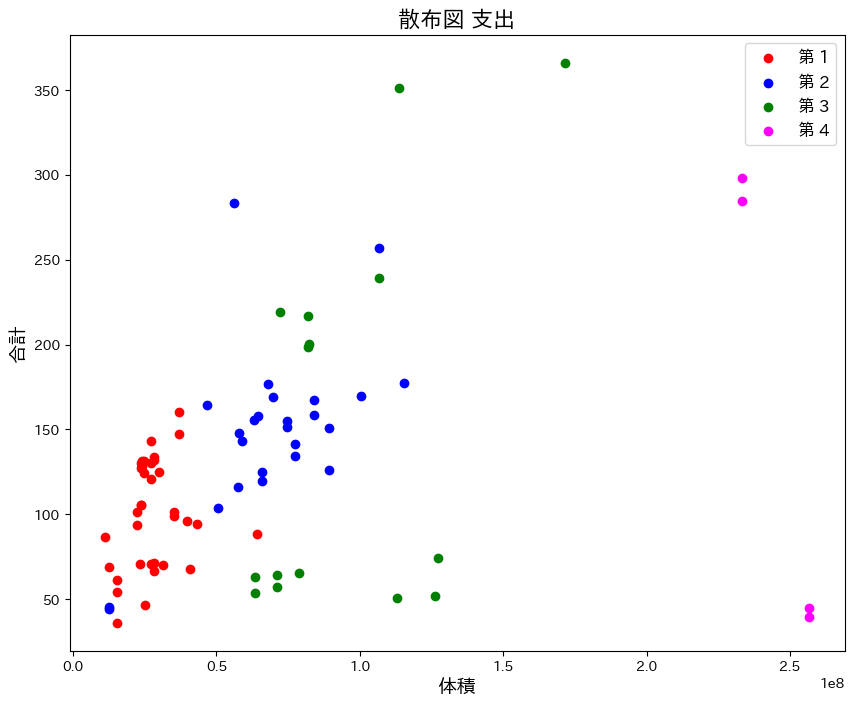

In [ ]:
bin_edges = [0, 500000, 1000000, 1700000, 2800000]

# Add a new column 'Bin' based on the '終了-開始' column
merged_df['Bin'] = pd.cut(merged_df['支出'], bins=bin_edges, labels=['第 1', '第 2', '第 3', '第 4'])

# Create a scatter plot for each bin with a distinctive color
plt.figure(figsize=(10, 8))
for bin_label, color in zip(['第 1', '第 2', '第 3', '第 4'], ['red', 'blue', 'green', 'magenta']):
    bin_data = merged_df[merged_df['Bin'] == bin_label]
    plt.scatter(bin_data['体積'], bin_data['合計'], color=color, label=bin_label)

# Customize the plot
plt.title('散布図 支出', fontsize=16)
plt.xlabel('体積', fontsize=14)
plt.ylabel('合計', fontsize=14)
plt.legend(fontsize=12)

plt.show()

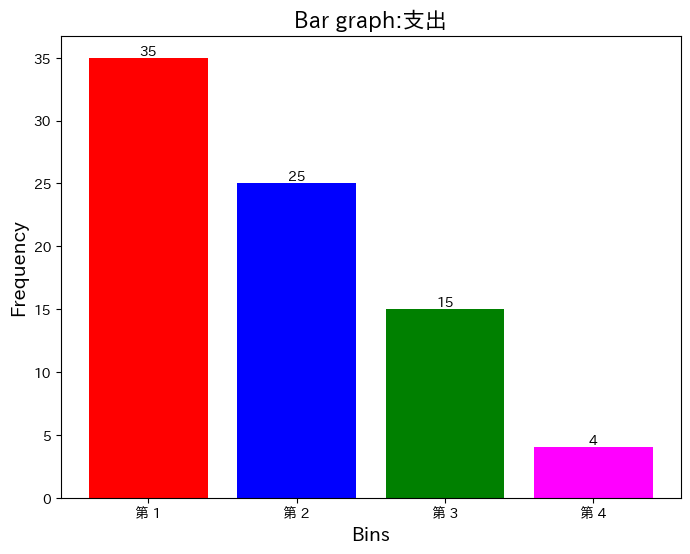

In [ ]:
# Bar
# Define the desired order
desired_order = ['第 1', '第 2', '第 3', '第 4']
# Count the occurrences of each bin label
bin_counts = merged_df['Bin'].value_counts()

# Sort the index based on the desired order
bin_counts = bin_counts.loc[desired_order]

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(bin_counts.index, bin_counts.values, color=['red', 'blue', 'green', 'magenta'])

# Annotate the exact frequency on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Bar graph:支出',fontsize = 16)
plt.xlabel('Bins', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

費用

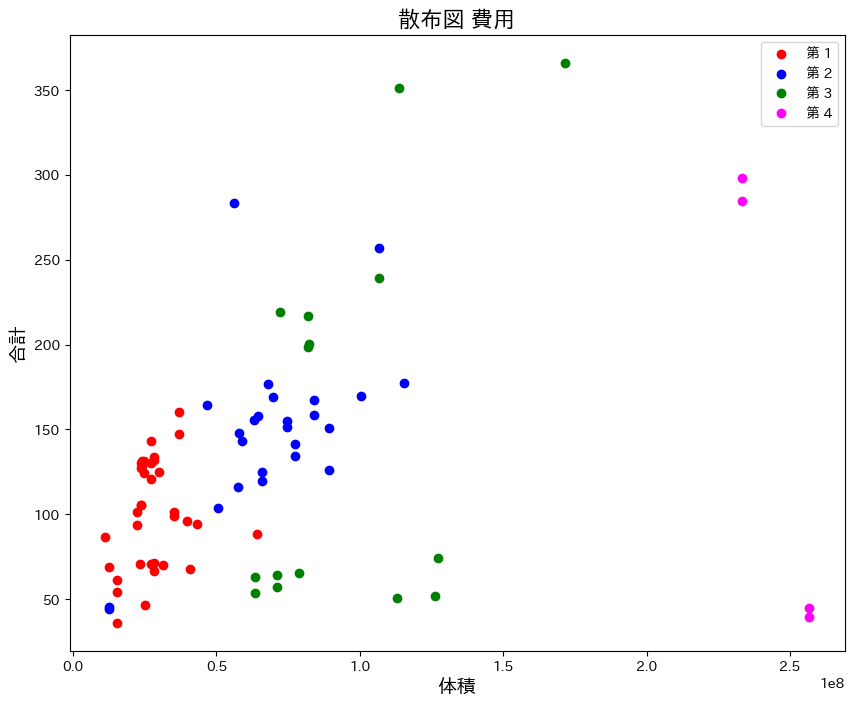

In [ ]:
bin_edges = [0, 1600000, 3000000, 4000000, 4600000]

# Add a new column 'Bin' based on the '終了-開始' column
merged_df['Bin_費用'] = pd.cut(merged_df['費用'], bins=bin_edges, labels=['第 1', '第 2', '第 3', '第 4'])

# Create a scatter plot for each bin with a distinctive color
plt.figure(figsize=(10, 8))
for bin_label, color in zip(['第 1', '第 2', '第 3', '第 4'], ['red', 'blue', 'green', 'magenta']):
    bin_data = merged_df[merged_df['Bin'] == bin_label]
    plt.scatter(bin_data['体積'], bin_data['合計'], color=color, label=bin_label)

# Customize the plot
plt.title('散布図 費用',fontsize=16)
plt.xlabel('体積',fontsize=14)
plt.ylabel('合計',fontsize=14)
plt.legend()  # Add legend to distinguish bins

plt.show()

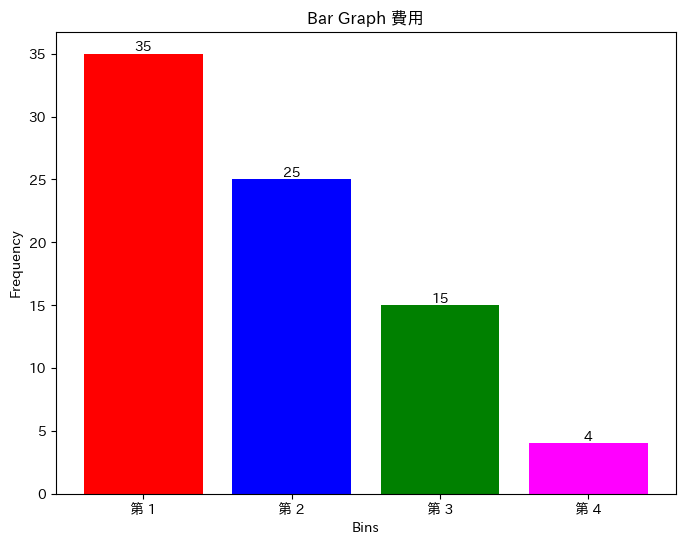

In [ ]:
# Bar
# Define the desired order
desired_order = ['第 1', '第 2', '第 3', '第 4']
# Count the occurrences of each bin label
bin_counts = merged_df['Bin'].value_counts()

# Sort the index based on the desired order
bin_counts = bin_counts.loc[desired_order]

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(bin_counts.index, bin_counts.values, color=['red', 'blue', 'green', 'magenta'])

# Annotate the exact frequency on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Bar Graph 費用')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

In [ ]:
merged_df=merged_df[(merged_df["Bin"] == "第 1") | (merged_df["Bin"] == "第 2")]

In [ ]:
merged_df=merged_df[(merged_df["Bin_費用"] == "第 1") | (merged_df["Bin_費用"] == "第 2")]

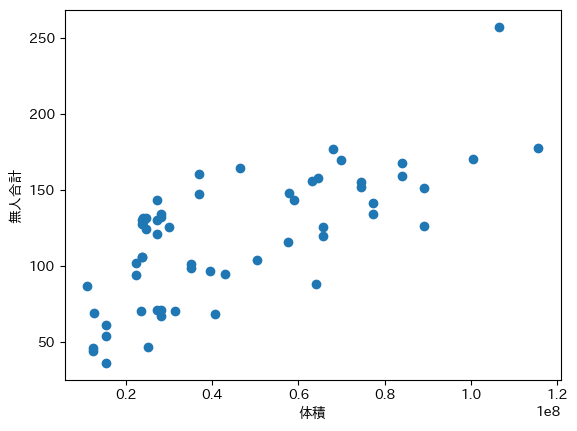

In [ ]:
plt.scatter(merged_df['体積'], merged_df['合計'])
# Customize the plot
# plt.title('散布図 費用',fontsize=16)
plt.xlabel('体積')
plt.ylabel('無人合計')
# plt.legend()  # Add legend to distinguish bins

plt.show()

#59個

In [ ]:
len(merged_df)

59

# **plot**

68.43458454129177 1.116983070118414e-06 0.5062706615800628
2.675642029276463e-10 7.645120602953197


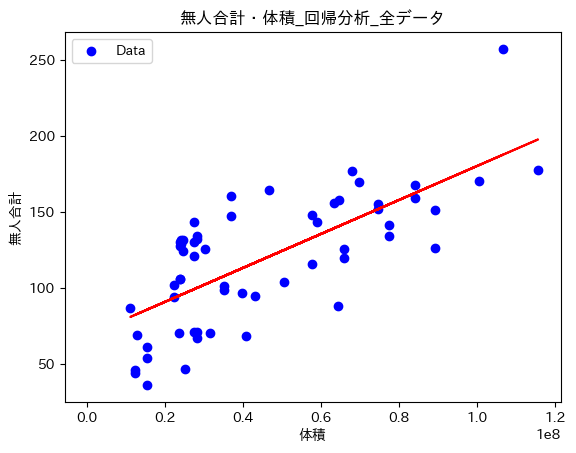

In [ ]:
y = merged_df['合計']
x = sm.add_constant(merged_df['体積'])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["体積"],results.tvalues["体積"])#P-valueT-value

plt.scatter(x["体積"], y, color='blue', label='Data')
plt.plot(x, x * results.params[1] + results.params[0], color='red')

plt.title("無人合計・体積_回帰分析_全データ")
plt.xlabel('体積')
plt.ylabel('無人合計')
plt.legend()

68.43458454129177 1.116983070118414e-06 0.5062706615800628
2.675642029276463e-10 7.645120602953197


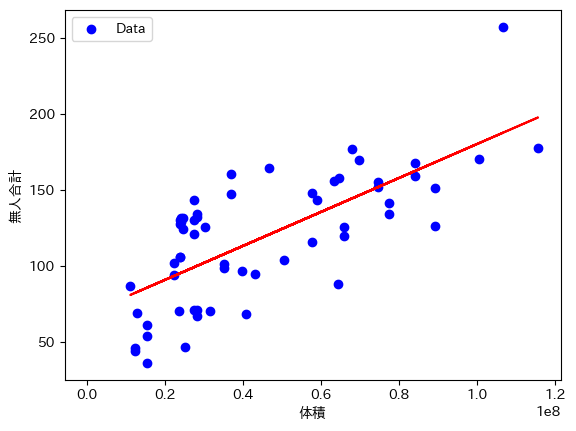

In [ ]:
y = merged_df['合計']
x = sm.add_constant(merged_df['体積'])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["体積"],results.tvalues["体積"])#P-valueT-value

plt.scatter(x["体積"], y, color='blue', label='Data')
plt.plot(x, x * results.params[1] + results.params[0], color='red')

# plt.title("")
plt.xlabel('体積')
plt.ylabel('無人合計')
plt.legend()

In [ ]:
merged_df

In [ ]:
merged_df.columns

Index(['製番', '無人原価', '合計', 'a', 'その他', '営業', '工務', '資材', '事業部', '生管',
       ...
       '煽り止め', 'スライドBカラー', 'スライドカラーB', 'パリソン押えB', '落下防止板', '煽り止めスペーサー', '取付板1',
       'ブラケットスペーサー', 'Bin', 'Bin_費用'],
      dtype='object', length=191)

In [ ]:
# x = merged_df["体積"]
# y = merged_df["合計"]
# z = merged_df["部品点数_mujin_not0"]

# # 3次元散布図の描画
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c='blue', marker='o')

# # ax.set_zticklabels(rotation='vertical')
# # 軸ラベルの設定
# ax.set_xlabel("体積")
# ax.set_ylabel('無人合計')
# ax.set_zlabel('部品点数')

# # グラフの表示
# plt.show()

In [ ]:
# x = merged_df["体積"]
# y = merged_df["合計"]
# z = merged_df["部品点数_mujin_not0"]

# # 3次元散布図の描画
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c='blue', marker='o')

# # ax.set_zticklabels(rotation='vertical')
# # 軸ラベルの設定
# ax.set_xlabel("体積")
# ax.set_ylabel('無人合計')
# ax.set_zlabel('部品個数')

# # グラフの表示
# plt.show()

In [ ]:
merged_df["体積/無人合計"]=merged_df["体積"]/merged_df["合計"]

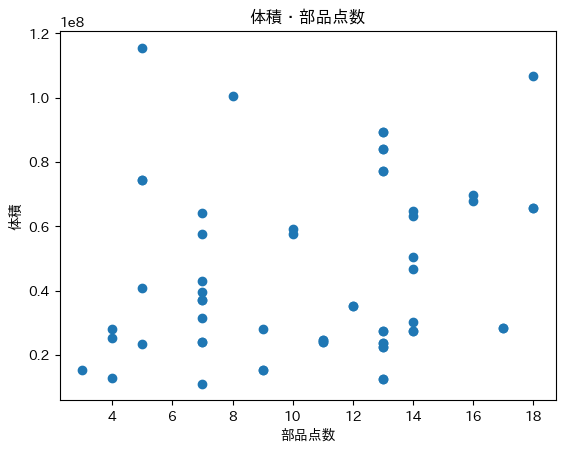

In [ ]:
plt.scatter(merged_df['部品点数_mujin_not0'], merged_df['体積'])
# Customize the plot
# plt.title('散布図 費用',fontsize=16)
plt.title("体積・部品点数")
plt.xlabel('部品点数')
plt.ylabel('体積')
# plt.legend()  # Add legend to distinguish bins

plt.show()

#59個

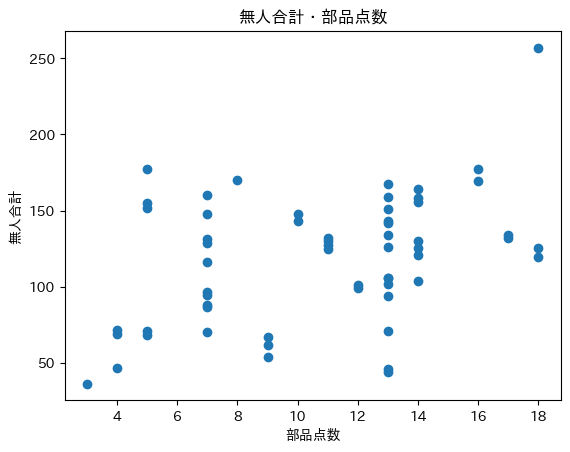

In [ ]:
plt.scatter(merged_df['部品点数_mujin_not0'], merged_df['合計'])
# Customize the plot
# plt.title('散布図 費用',fontsize=16)
plt.title("無人合計・部品点数")
plt.xlabel('部品点数')
plt.ylabel('無人合計')
# plt.legend()  # Add legend to distinguish bins

plt.show()

#59個

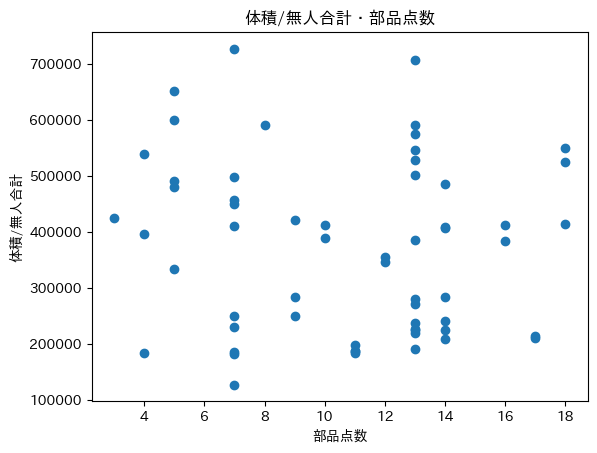

In [ ]:
plt.scatter(merged_df['部品点数_mujin_not0'], merged_df['体積/無人合計'])
# Customize the plot
# plt.title('散布図 費用',fontsize=16)
plt.title("体積/無人合計・部品点数")
plt.xlabel('部品点数')
plt.ylabel('体積/無人合計')
# plt.legend()  # Add legend to distinguish bins

plt.show()

#59個

In [ ]:
df_plot = pd.concat([merged_df["体積"], merged_df.iloc[:, 32:]], axis=1)

In [ ]:
merged_df.to_csv('merged_df.csv',encoding="utf-8",index = False)
files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **主成分分析**

In [ ]:
# df=merged_df.loc[:,["合計","体積","Assy","キャビティB面","キャビティA面","取付板A","アーム","ロッド","取付板B","パリソン押え","キャビティB","キャビティA","スペーサー","吹込み針"]]

In [ ]:
# df.to_csv('df_used.csv',encoding="utf-8",index = False)
# files.download('df_used.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
selected_columns = ["製番","合計", "体積"] + df7.columns.tolist()[1:]
merged_df = merged_df.loc[:, selected_columns].reset_index(drop=True)
df=merged_df

In [ ]:
# df1=merged_df.loc[:,["Assy","キャビティB面","キャビティA面","取付板A","アーム","ロッド","取付板B","パリソン押え","キャビティB","キャビティA","スペーサー","吹込み針"]]

In [ ]:
len(df)

59

In [ ]:
df

,製番,合計,体積,EJピン,GB&GPブロック,GPGB当て棒,アーム,あおり止め,エアーマニホールド,エアシリンダー,...,煽り止め,大取付板,置き入子,当て棒,入子,配管ブロック,落下防止,落下防止ブロック,落下防止延長,落下防止板
0,230050,44.1,12376000.0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,230049,45.6,12376000.0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,230046,134.2,77265000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,230045,141.5,77265000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,230030,143.1,58979437.5,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,230029,148.0,57711062.5,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,230025,169.9,100386000.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,222293,131.7,24645000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,222292,124.4,24645000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,222291,127.2,23850000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df1=df.iloc[:,3:]
# データの標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

# 主成分分析の実行
pca = PCA(n_components=16)  # 2つの主成分を取得
principal_components = pca.fit_transform(df_scaled)

# 結果をDataFrameに格納
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2',"PC3","PC4","PC5","PC6","PC7",'PC8', 'PC9',"PC10","PC11","PC12","PC13","PC14","PC15","PC16"])

# 主成分の寄与率を表示
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# # グラフで可視化
# plt.scatter(pc_df['PC1'], pc_df['PC2'])
# plt.title('主成分分析')
# plt.xlabel('主成分1')
# plt.ylabel('主成分2')
# plt.show()


Explained Variance Ratio: [0.13575883 0.10356823 0.07901529 0.07258166 0.06769339 0.0646304
 0.05568454 0.04795913 0.04537395 0.03805811 0.033453   0.03029917
 0.02915553 0.02685789 0.02524671 0.02396087]


In [ ]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.881712,-2.193676,-0.054385,5.407547,1.219295,-2.081180,-0.036509,0.070198,-2.318484,0.365196,-0.085659,0.271216,-0.222463,1.323970,-0.148787,0.579489
1,-1.474151,-1.856261,-0.070562,4.581326,1.234271,-2.202356,-0.173303,1.036919,-1.717893,-0.292956,-0.020347,0.008412,0.121439,0.445597,0.262030,-1.172083
2,-1.930089,-1.252568,0.021427,2.308072,0.684219,-0.467363,0.382375,-0.921437,-0.661384,0.826844,0.289173,0.688185,-0.855793,0.666447,-0.278118,2.173637
3,-1.930089,-1.252568,0.021427,2.308072,0.684219,-0.467363,0.382375,-0.921437,-0.661384,0.826844,0.289173,0.688185,-0.855793,0.666447,-0.278118,2.173637
4,-0.747165,-0.418656,-0.380125,0.917495,-0.536690,-0.835976,-0.629553,0.477594,0.114141,-0.147393,-0.529035,0.421477,0.428525,-0.866445,-0.187758,0.259639
5,-0.747165,-0.418656,-0.380125,0.917495,-0.536690,-0.835976,-0.629553,0.477594,0.114141,-0.147393,-0.529035,0.421477,0.428525,-0.866445,-0.187758,0.259639
6,0.919511,0.705525,0.693249,-0.715507,-0.164789,-1.402276,-0.335025,-0.063849,0.506983,-2.217292,-2.199757,5.508861,0.524826,-1.584419,1.638667,2.855423
7,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179
8,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179
9,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179


In [ ]:
for i in range(pca.n_components_):
    weights = pca.components_[i]
    variables = df1.columns
    equation = " + ".join([f"{weights[j]:.3f} * {variables[j]}" for j in range(len(variables))])
    print(f"PC{i+1} = {equation}")

PC1 = -0.000 * EJピン + -0.151 * GB&GPブロック + -0.093 * GPGB当て棒 + -0.381 * アーム + -0.038 * あおり止め + -0.050 * エアーマニホールド + 0.255 * エアシリンダー + -0.044 * エア配管ブロック + 0.000 * エジェクターピン + 0.154 * ガイドプレート + -0.337 * ガイドブロック + -0.000 * ガイドレール + -0.086 * カラー1 + 0.030 * キャビティA面 + 0.000 * キャビティB面 + -0.114 * サポートピン + -0.000 * ジョイント + 0.000 * ジョイントB3 + 0.154 * シリンダーブラケット + 0.000 * スプリングシリンダブラケット + -0.135 * スペーサー + -0.069 * スライドAシャフト + -0.000 * スライドB2ジョイント + -0.000 * スライドB2ブラケット + -0.069 * スライドカラー + -0.069 * スライドコア + 0.000 * スライドブラケット + -0.332 * パリソン押さえ + -0.065 * ピンチガイドブロック + -0.069 * ブラケット + -0.000 * ブラケットスペーサー + -0.000 * ブラケット脚 + -0.046 * プラテンサポート + 0.067 * プレート + -0.093 * ブローピン + -0.063 * ブロック + -0.381 * ロッド + 0.104 * 位置決めキー + 0.021 * 位置決めバー + -0.037 * 位置決めピン + 0.008 * 位置決め板 + -0.039 * 延長板 + 0.107 * 開き止め栓 + 0.000 * 蓋用ロッド + 0.139 * 止め栓 + -0.113 * 取付板 + 0.000 * 焼結ベント + 0.255 * 吹込みブラケット + 0.000 * 吹込み蓋 + -0.132 * 吹込針 + 0.000 * 吹込止栓 + 0.000 * 水平バー + -0.107 * 煽り止め + 0.000 * 大取付板 + 0.000 * 置き入子 + -0.144 * 当て棒 + 

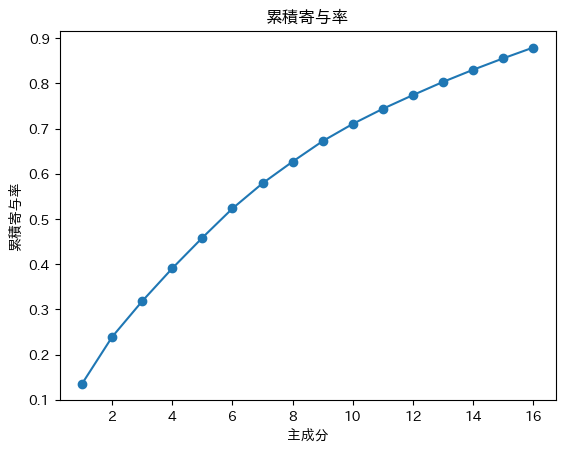

In [ ]:
# 累積寄与率を計算
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# 累積寄与率を折れ線グラフで表示
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.title('累積寄与率')
plt.show()


In [ ]:
pc_loading_df = pd.DataFrame(pca.components_, columns=df1.columns)
pc_loading_df

,EJピン,GB&GPブロック,GPGB当て棒,アーム,あおり止め,エアーマニホールド,エアシリンダー,エア配管ブロック,エジェクターピン,ガイドプレート,...,煽り止め,大取付板,置き入子,当て棒,入子,配管ブロック,落下防止,落下防止ブロック,落下防止延長,落下防止板
0,-1.110223e-16,-0.151414,-0.092739,-0.380822,-0.038175,-0.049548,0.254786,-0.043978,2.710505e-20,0.153865,...,-0.107007,0.0,0.0,-0.143629,-0.086153,-0.177333,-0.104117,-0.089593,0.0,-0.154895
1,-0.000000e+00,-0.106767,0.000063,-0.020449,-0.024674,-0.026404,-0.020938,-0.003384,-4.336809e-19,-0.014437,...,-0.122480,-0.0,-0.0,0.161456,-0.012643,-0.080761,-0.121693,-0.049614,-0.0,-0.036138
2,9.194034e-17,-0.013991,0.270695,-0.076646,-0.022749,0.003430,0.107929,0.067557,5.551115e-17,0.091399,...,-0.030342,0.0,0.0,0.257678,0.344273,0.351023,-0.036288,-0.099686,0.0,0.296517
3,-1.110223e-16,-0.013787,-0.152669,0.014406,-0.006057,-0.016525,0.106223,-0.062861,-1.387779e-17,0.098344,...,0.344556,0.0,0.0,-0.181729,-0.098756,0.044602,0.380233,-0.012583,0.0,-0.132786
4,-0.000000e+00,-0.214402,-0.183568,0.064333,-0.037187,-0.027409,0.180644,0.049178,2.775558e-17,0.182326,...,0.056996,-0.0,-0.0,0.148042,0.225726,0.108244,0.062162,-0.089617,-0.0,-0.012637
5,-1.110223e-16,0.086442,0.044769,0.042760,0.043147,0.033421,0.294760,-0.011257,-2.775558e-17,0.317663,...,-0.147583,-0.0,-0.0,-0.036756,-0.084301,-0.045423,-0.175781,0.189688,-0.0,-0.021782
6,2.688821e-17,-0.121910,-0.347677,-0.025862,0.164783,-0.061837,-0.042540,-0.055196,6.245005e-17,-0.060368,...,-0.084048,0.0,0.0,0.008627,0.352024,0.202567,-0.046545,0.016980,0.0,-0.154601
7,1.387779e-17,0.157126,0.122896,0.054243,0.021722,0.053386,0.063827,0.106396,2.775558e-17,0.143468,...,0.158991,0.0,0.0,0.097096,-0.059884,-0.125411,0.072762,-0.441016,0.0,0.167617
8,-0.000000e+00,0.016360,-0.234288,0.119966,-0.071976,0.175729,0.005102,0.293160,2.775558e-17,0.015084,...,-0.101483,-0.0,-0.0,0.027481,-0.022904,-0.238390,-0.162360,0.219467,-0.0,0.169104
9,-5.551115e-17,0.074140,0.161663,0.018768,0.027195,-0.067711,-0.009139,-0.291507,5.551115e-17,0.216280,...,-0.054315,-0.0,-0.0,-0.089903,0.016889,0.169899,0.023834,0.153002,-0.0,-0.150789


In [ ]:
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
# 主成分を説明変数として重回帰分析を行うためのデータセットを作成
regression_data = pd.concat([df[["製番","合計", "体積"]],pc_df.iloc[:, :16]], axis=1)

In [ ]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.881712,-2.193676,-0.054385,5.407547,1.219295,-2.081180,-0.036509,0.070198,-2.318484,0.365196,-0.085659,0.271216,-0.222463,1.323970,-0.148787,0.579489
1,-1.474151,-1.856261,-0.070562,4.581326,1.234271,-2.202356,-0.173303,1.036919,-1.717893,-0.292956,-0.020347,0.008412,0.121439,0.445597,0.262030,-1.172083
2,-1.930089,-1.252568,0.021427,2.308072,0.684219,-0.467363,0.382375,-0.921437,-0.661384,0.826844,0.289173,0.688185,-0.855793,0.666447,-0.278118,2.173637
3,-1.930089,-1.252568,0.021427,2.308072,0.684219,-0.467363,0.382375,-0.921437,-0.661384,0.826844,0.289173,0.688185,-0.855793,0.666447,-0.278118,2.173637
4,-0.747165,-0.418656,-0.380125,0.917495,-0.536690,-0.835976,-0.629553,0.477594,0.114141,-0.147393,-0.529035,0.421477,0.428525,-0.866445,-0.187758,0.259639
5,-0.747165,-0.418656,-0.380125,0.917495,-0.536690,-0.835976,-0.629553,0.477594,0.114141,-0.147393,-0.529035,0.421477,0.428525,-0.866445,-0.187758,0.259639
6,0.919511,0.705525,0.693249,-0.715507,-0.164789,-1.402276,-0.335025,-0.063849,0.506983,-2.217292,-2.199757,5.508861,0.524826,-1.584419,1.638667,2.855423
7,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179
8,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179
9,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179


In [ ]:
pc_loading_df.to_csv('pc_loading_df.csv',encoding="CP932",index = False)
files.download('pc_loading_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pc_loading_df

,EJピン,GB&GPブロック,GPGB当て棒,アーム,あおり止め,エアーマニホールド,エアシリンダー,エア配管ブロック,エジェクターピン,ガイドプレート,...,煽り止め,大取付板,置き入子,当て棒,入子,配管ブロック,落下防止,落下防止ブロック,落下防止延長,落下防止板
0,-1.110223e-16,-0.151414,-0.092739,-0.380822,-0.038175,-0.049548,0.254786,-0.043978,2.710505e-20,0.153865,...,-0.107007,0.0,0.0,-0.143629,-0.086153,-0.177333,-0.104117,-0.089593,0.0,-0.154895
1,-0.000000e+00,-0.106767,0.000063,-0.020449,-0.024674,-0.026404,-0.020938,-0.003384,-4.336809e-19,-0.014437,...,-0.122480,-0.0,-0.0,0.161456,-0.012643,-0.080761,-0.121693,-0.049614,-0.0,-0.036138
2,9.194034e-17,-0.013991,0.270695,-0.076646,-0.022749,0.003430,0.107929,0.067557,5.551115e-17,0.091399,...,-0.030342,0.0,0.0,0.257678,0.344273,0.351023,-0.036288,-0.099686,0.0,0.296517
3,-1.110223e-16,-0.013787,-0.152669,0.014406,-0.006057,-0.016525,0.106223,-0.062861,-1.387779e-17,0.098344,...,0.344556,0.0,0.0,-0.181729,-0.098756,0.044602,0.380233,-0.012583,0.0,-0.132786
4,-0.000000e+00,-0.214402,-0.183568,0.064333,-0.037187,-0.027409,0.180644,0.049178,2.775558e-17,0.182326,...,0.056996,-0.0,-0.0,0.148042,0.225726,0.108244,0.062162,-0.089617,-0.0,-0.012637
5,-1.110223e-16,0.086442,0.044769,0.042760,0.043147,0.033421,0.294760,-0.011257,-2.775558e-17,0.317663,...,-0.147583,-0.0,-0.0,-0.036756,-0.084301,-0.045423,-0.175781,0.189688,-0.0,-0.021782
6,2.688821e-17,-0.121910,-0.347677,-0.025862,0.164783,-0.061837,-0.042540,-0.055196,6.245005e-17,-0.060368,...,-0.084048,0.0,0.0,0.008627,0.352024,0.202567,-0.046545,0.016980,0.0,-0.154601
7,1.387779e-17,0.157126,0.122896,0.054243,0.021722,0.053386,0.063827,0.106396,2.775558e-17,0.143468,...,0.158991,0.0,0.0,0.097096,-0.059884,-0.125411,0.072762,-0.441016,0.0,0.167617
8,-0.000000e+00,0.016360,-0.234288,0.119966,-0.071976,0.175729,0.005102,0.293160,2.775558e-17,0.015084,...,-0.101483,-0.0,-0.0,0.027481,-0.022904,-0.238390,-0.162360,0.219467,-0.0,0.169104
9,-5.551115e-17,0.074140,0.161663,0.018768,0.027195,-0.067711,-0.009139,-0.291507,5.551115e-17,0.216280,...,-0.054315,-0.0,-0.0,-0.089903,0.016889,0.169899,0.023834,0.153002,-0.0,-0.150789


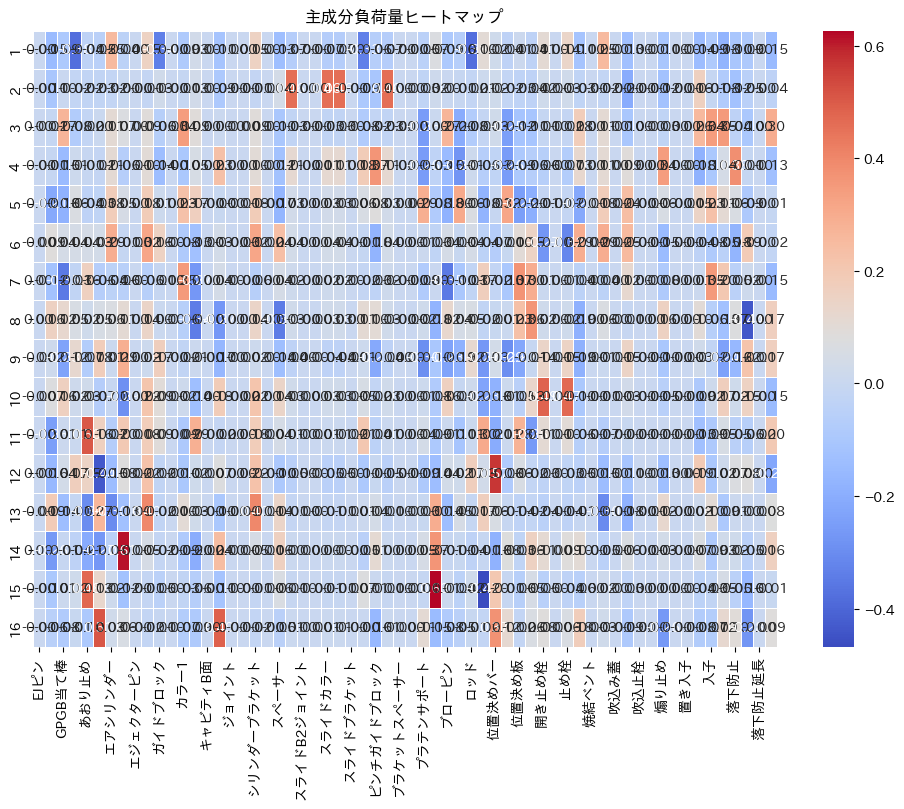

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# インデックスを1から始めるために+1する
pc_loading_df.index += 1

plt.figure(figsize=(12, 8))
sns.heatmap(pc_loading_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('主成分負荷量ヒートマップ')
plt.show()


# **重回帰**

In [ ]:
selected_columns = ["製番","合計", "体積"] + df7.columns.tolist()[1:]

In [ ]:
merged_df = merged_df.loc[:, selected_columns].reset_index(drop=True)

In [ ]:
# df = pd.get_dummies(merged_df, columns=merged_df.columns[3:].tolist(), drop_first=True)

In [ ]:
df=merged_df

In [ ]:
# df = df.drop(labels=["製番"],axis=1)

In [ ]:
regression_data

,製番,合計,体積,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,230050,44.1,12376000.0,-1.881712,-2.193676,-0.054385,5.407547,1.219295,-2.081180,-0.036509,0.070198,-2.318484,0.365196,-0.085659,0.271216,-0.222463,1.323970,-0.148787,0.579489
1,230049,45.6,12376000.0,-1.474151,-1.856261,-0.070562,4.581326,1.234271,-2.202356,-0.173303,1.036919,-1.717893,-0.292956,-0.020347,0.008412,0.121439,0.445597,0.262030,-1.172083
2,230046,134.2,77265000.0,-1.930089,-1.252568,0.021427,2.308072,0.684219,-0.467363,0.382375,-0.921437,-0.661384,0.826844,0.289173,0.688185,-0.855793,0.666447,-0.278118,2.173637
3,230045,141.5,77265000.0,-1.930089,-1.252568,0.021427,2.308072,0.684219,-0.467363,0.382375,-0.921437,-0.661384,0.826844,0.289173,0.688185,-0.855793,0.666447,-0.278118,2.173637
4,230030,143.1,58979437.5,-0.747165,-0.418656,-0.380125,0.917495,-0.536690,-0.835976,-0.629553,0.477594,0.114141,-0.147393,-0.529035,0.421477,0.428525,-0.866445,-0.187758,0.259639
5,230029,148.0,57711062.5,-0.747165,-0.418656,-0.380125,0.917495,-0.536690,-0.835976,-0.629553,0.477594,0.114141,-0.147393,-0.529035,0.421477,0.428525,-0.866445,-0.187758,0.259639
6,230025,169.9,100386000.0,0.919511,0.705525,0.693249,-0.715507,-0.164789,-1.402276,-0.335025,-0.063849,0.506983,-2.217292,-2.199757,5.508861,0.524826,-1.584419,1.638667,2.855423
7,222293,131.7,24645000.0,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179
8,222292,124.4,24645000.0,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179
9,222291,127.2,23850000.0,-0.877841,-0.579384,-0.665330,-0.024858,-0.373615,0.541790,-0.208361,-0.537893,1.282894,0.121062,-0.492374,0.136246,0.019167,-0.891894,-0.410610,-0.700179


In [ ]:
df=regression_data

In [ ]:
# df=df.iloc[:,1:]

# 説明変数に定数項を追加
X = sm.add_constant(df.iloc[:,2:])
Y = df.iloc[:,1]
# モデルの適合
model = sm.OLS(Y, X).fit()

# 回帰係数の表示
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     12.63
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.84e-11
Time:                        00:27:41   Log-Likelihood:                -249.89
No. Observations:                  59   AIC:                             535.8
Df Residuals:                      41   BIC:                             573.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.0805      6.950      9.652      0.0

In [ ]:
intercept = model.params.get('Intercept', 0.0)  # 'Intercept'が存在しない場合は0.0をデフォルトに

# 係数の取得
coefficients = model.params.drop('Intercept', errors='ignore')  # 'Intercept'を除外

# 式の構築
equation = f"y = {intercept:.10f}"

for i, coef in enumerate(coefficients):
    equation += f" + {coef:.10f} * {coefficients.index[i]}"

print("回帰式:", equation)

回帰式: y = 0.0000000000 + 67.0804845413 * const + 0.0000011473 * 体積 + -3.1869504924 * PC1 + 2.2893512385 * PC2 + 4.2113532239 * PC3 + -0.9231423704 * PC4 + 3.3557965376 * PC5 + 4.4657682803 * PC6 + -2.1985811209 * PC7 + -0.8167552844 * PC8 + 2.1696690487 * PC9 + -4.2856065529 * PC10 + -3.5585110724 * PC11 + -9.2736917607 * PC12 + -4.3416202166 * PC13 + -10.5557319599 * PC14 + -2.9332776635 * PC15 + -4.1903698055 * PC16


In [ ]:
coefficients

const    67.080485
体積        0.000001
PC1      -3.186950
PC2       2.289351
PC3       4.211353
PC4      -0.923142
PC5       3.355797
PC6       4.465768
PC7      -2.198581
PC8      -0.816755
PC9       2.169669
PC10     -4.285607
PC11     -3.558511
PC12     -9.273692
PC13     -4.341620
PC14    -10.555732
PC15     -2.933278
PC16     -4.190370
dtype: float64

In [ ]:
# df["predict"]=model.predict(df.iloc[:,2:])
df["predict"]=model.predict(sm.add_constant(df.iloc[:, 2:]))

In [ ]:
df.to_csv('df.csv',encoding="cp932",index = False)
# df8.to_csv('df8.csv',encoding="utf-8",index = False)
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

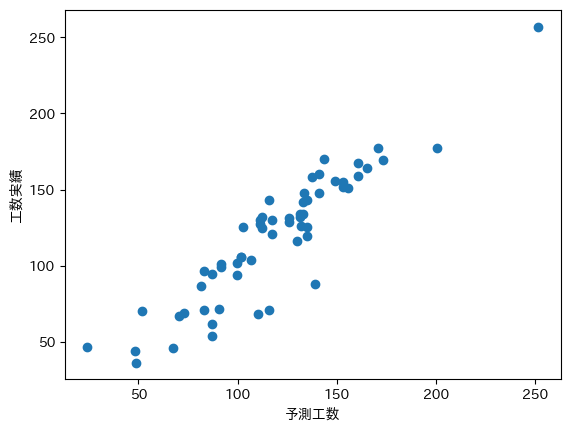

In [ ]:
plt.scatter(df['predict'], df['合計'])
# Customize the plot
# plt.title('散布図 費用',fontsize=16)
plt.title("")
plt.xlabel('予測工数')
plt.ylabel('工数実績')
# plt.legend()  # Add legend to distinguish bins

plt.show()

#59個

In [ ]:
# 自由度
print("自由度:")
print("  Total: ", model.df_model + model.df_resid)
print("  Model: ", model.df_model)
print("  Residual: ", model.df_resid)


自由度:
  Total:  58.0
  Model:  36.0
  Residual:  22.0


In [ ]:
#all process

# df=df.iloc[:,1:]

# 説明変数に定数項を追加
X = sm.add_constant(df.iloc[:,1:])
Y = df.iloc[:,0]
# モデルの適合
model = sm.OLS(Y, X).fit()

# 回帰係数の表示
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     21.60
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           8.84e-12
Time:                        05:20:52   Log-Likelihood:                -204.05
No. Observations:                  59   AIC:                             476.1
Df Residuals:                      25   BIC:                             546.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積              7.752e-07   1.71e-07      4.

In [ ]:
# 自由度
print("自由度:")
print("  Total: ", model.df_model + model.df_resid)
print("  Model: ", model.df_model)
print("  Residual: ", model.df_resid)


自由度:
  Total:  58.0
  Model:  33.0
  Residual:  25.0


In [ ]:
df

,合計,体積,取付板B-1_1,プレート_1,落下防止板_1,配管ブロック_1,スペーサB_1,取付板A-2_1,GPGB当て棒_1,取付板1_1,...,取付板B_1,ガイドブロック_1,スペーサー_1,ロッド_1,シリンダーブラケット_1,スペーサ1_1,止め栓_1,スライドコアA1_1,あおり止め_1,パリソン押えB_1
0,44.1,12376000.0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,45.6,12376000.0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,134.2,77265000.0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
3,141.5,77265000.0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
4,143.1,58979437.5,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
5,148.0,57711062.5,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
6,169.9,100386000.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7,131.7,24645000.0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
8,124.4,24645000.0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
9,127.2,23850000.0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
df.columns[1:]

Index(['体積', '取付板B-1_1', 'プレート_1', '落下防止板_1', '配管ブロック_1', 'スペーサB_1',
       '取付板A-2_1', 'GPGB当て棒_1', '取付板1_1', '位置決めバー_1', 'パリソン押さえB_1',
       'プラテンサポートA_1', '煽り止め_1', '位置決めピン_1', '入子A_1', 'パリソン押さえA_1', '配管ブロックA_1',
       'キャビティB面_1', '落下防止ブロック_1', 'パリソン押えA_1', 'パリソン押え_1', 'スペーサーA_1',
       'GP & GBブロック_1', 'カラー1_1', 'スライドコアB2_1', 'エア配管ブロック_1', 'スペーサー2_1',
       'スライドAシャフト_1', '配管ブロックC_1', 'GPGBブロック_1', '取付板2_1', '当棒_1',
       'プラテンサポートB_1', '当て棒_1', '取付板C_1', 'キャビティA面_1', 'スペーサー1_1',
       '落下防止ブロック1_1', 'スペーサA_1', 'エアシリンダー_1', 'キャビティA_1', 'エアーマニホールド_1',
       '落下防止ブロック2_1', 'プラテンサポート_1', 'スライドコアB1_1', '取付板A_1', '配管ブロックB_1',
       'スペーサーB_1', 'スペーサ2_1', '当て棒A_1', 'GP&GBブロック_1', 'キャビティB_1',
       'GB&GPブロック_1', '位置決め板_1', 'ガイドプレート_1', 'サポートピン_1', 'ブロック_1', '入子B_1',
       '吹込み針_1', '落下防止_1', 'スライドコアA2_1', '取付板A-1_1', '開き止め栓_1', '吹込みブラケット_1',
       '取付板B-2_1', 'ピンチガイドブロック_1', 'ブローピン_1', '取付板_1', '当て棒B_1', '位置決めキー_1',
       'アーム_1', '延長板_1', 'スライドBカラー_1', 'ブラケット_1', 'GB & GPブロ

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
merged_df=merged_df.iloc[:,1:]

# 説明変数に定数項を追加
X = sm.add_constant(merged_df.iloc[:,1:])
Y = merged_df.iloc[:,0]
# モデルの適合
model = sm.OLS(Y, X).fit()

# 回帰係数の表示
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     10.35
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           9.21e-12
Time:                        01:37:49   Log-Likelihood:                -355.06
No. Observations:                  79   AIC:                             786.1
Df Residuals:                      41   BIC:                             876.2
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
体積               1.228e-07   1.31e-07     

# **交差検定**

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# データの読み込みや生成
# df = ...

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 2:])
Y = df.iloc[:, 1]

# データを8:2で分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# モデルの適合（学習）
model = sm.OLS(Y_train, X_train).fit()

# テストデータで評価
predictions = model.predict(X_test)

# 予測結果と実際の値を比較
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
print(comparison)

# 評価指標の表示（必要に応じて）
# 例：平均二乗誤差（MSE）
mse = ((Y_test - predictions) ** 2).mean()
print(f"Mean Squared Error: {mse}")


    Actual   Predicted
0     44.1  -29.696081
5    148.0  142.335827
34   130.1  121.000000
13   105.7  100.884010
45    61.3   54.000000
53   160.3  140.941791
57    70.5   94.863329
25   132.2  133.800000
47    70.1  122.617303
12   155.6  132.292939
49    36.2   50.789461
3    141.5  134.200000
Mean Squared Error: 847.961568244462


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     12.25
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           3.25e-06
Time:                        00:37:02   Log-Likelihood:                -163.81
No. Observations:                  47   AIC:                             391.6
Df Residuals:                      15   BIC:                             450.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積              6.025e-07   3.78e-07      1.

0     -29.696080
3     134.200000
5     142.335826
12    132.292938
13    100.884010
25    133.800000
34    120.999999
45     53.999999
47    122.617303
49     50.789461
53    140.941791
57     94.863329
dtype: float64
0.8805763034085052


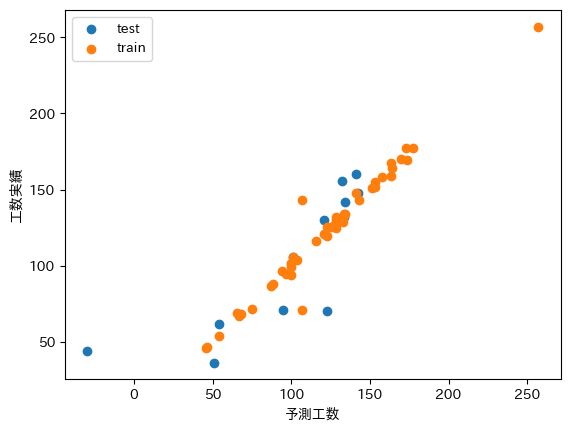

4     147.072625
6     111.759835
8     129.724442
17    132.200000
19     47.346542
30    178.223626
31    143.200000
36     92.053675
44     63.072700
50     74.029545
54    145.794908
55     63.694534
dtype: float64
0.8955520867762601


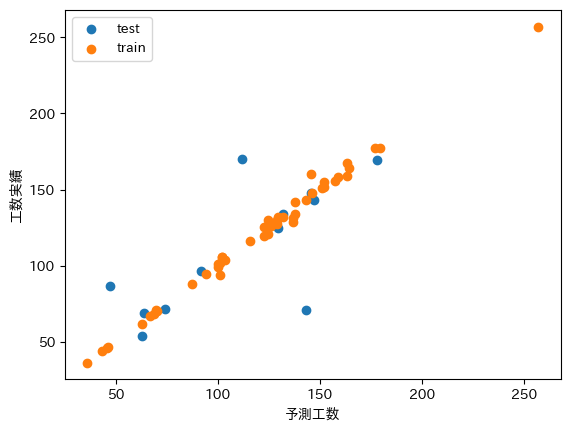

9     128.442132
11    103.773564
15    104.755516
16    104.755516
24    155.328713
26    155.328713
27    167.600000
32     70.600000
33    129.388763
41     26.044415
52    141.583455
56    143.917187
dtype: float64
0.8313523285488496


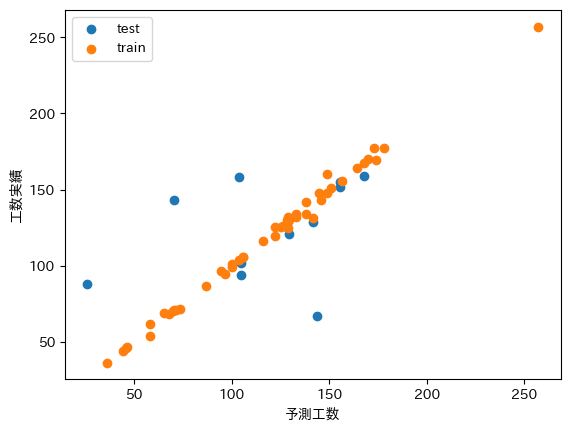

1      63.421904
2     141.500000
21     98.800000
23    187.928190
29    167.894754
35     89.640262
37     99.186335
39    165.646989
40    169.339372
43    125.030821
46    142.293899
48     44.172841
dtype: float64
0.8088096973737309


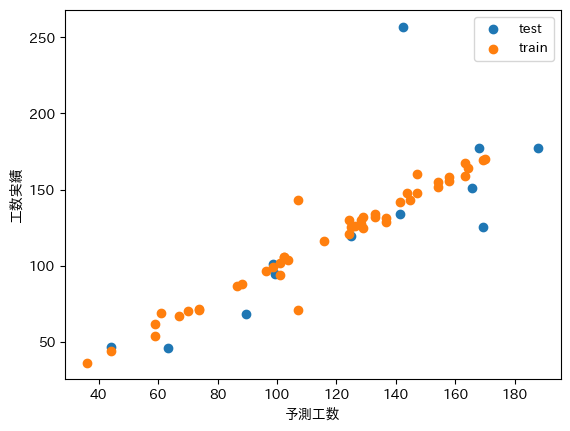

7     128.250493
10    127.638956
14    100.068096
18    120.061533
20     62.779701
22    101.300000
28    158.800000
38    119.926203
42    121.631195
51    138.750019
58    182.825114
dtype: float64
0.9464532545221324


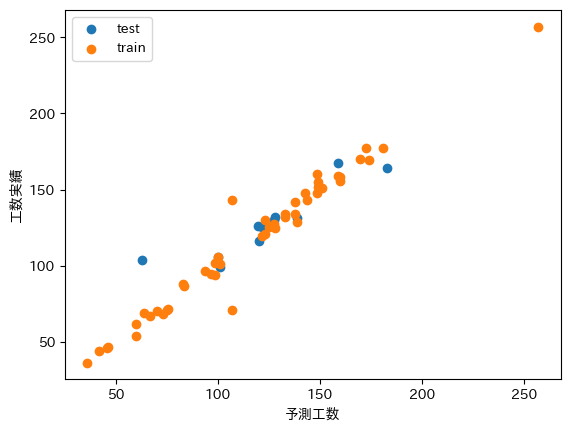

Fold 1: MSE = 847.9615617310425
Fold 2: MSE = 872.6031457633335
Fold 3: MSE = 1538.4571747576604
Fold 4: MSE = 1370.378210713022
Fold 5: MSE = 206.2964659477917
Average MSE: 967.1393117825701


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import statsmodels.api as sm

# データの読み込みや生成
# df = ...

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 2:])
Y = df.iloc[:, 1]

# k分割交差検定の準備
k = 5  # 例として5分割
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 各分割でのモデルの評価
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = sm.OLS(Y_train, X_train).fit()

    predictions = model.predict(X_test)
    predictions2 = model.predict(X_train)

    mse = ((Y_test - predictions) ** 2).mean()
    mse_scores.append(mse)
    # print(model.summary())
    print(predictions)

    comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
    comparison2 = pd.DataFrame({'Actual': Y_train, 'Predicted': predictions2})

    plt.scatter(predictions, Y_test,label="test")
    plt.scatter(predictions2, Y_train,label="train")
    # Customize the plot
    # plt.title('散布図 費用',fontsize=16)

    y = pd.concat([predictions, predictions2])
    x = sm.add_constant(pd.concat([Y_test, Y_train]))

    model = sm.OLS(y, x)
    results = model.fit()

    results.params[0]#切片b
    results.params[1]#係数a
    y_pred = results.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

    plt.title("")
    plt.xlabel('予測工数')
    plt.ylabel('工数実績')
    plt.legend()

    plt.show()

    df_date=pd.concat([df_date,pd.merge(x,y.to_frame(),left_index=True,right_index=True)])
# 各分割のMSEを表示
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse}")

# 平均MSEを表示
average_mse = np.mean(mse_scores)
print(f"Average MSE: {average_mse}")


6      38.227686
15     93.800000
56    135.687649
40    224.190774
37     98.444469
29    168.281643
43    125.200000
10    127.443829
58    266.481911
14     94.736228
dtype: float64
0.5798621695827855


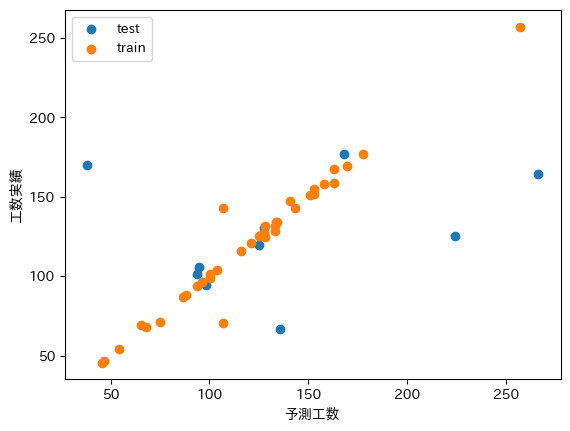

17     42.678408
54    135.617545
30    177.809517
50     75.837355
9     128.499649
26    159.077907
24    159.077907
35    133.048384
20     21.081905
28    158.800000
dtype: float64
0.75054613233672


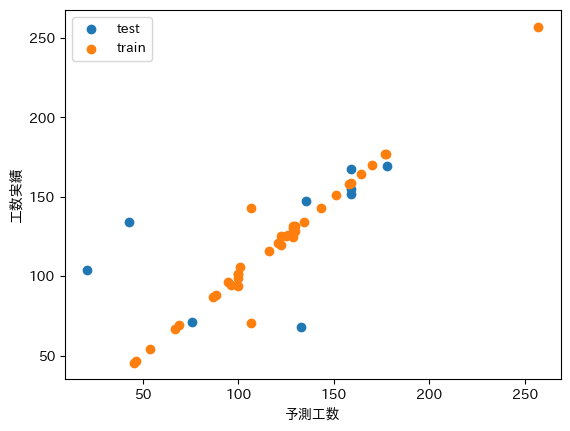

36     92.145881
4     192.197643
55     61.271136
16    103.007951
21     98.800000
2      37.595229
46     -4.594324
39    157.022136
51    133.798634
dtype: float64
0.24171633851620578


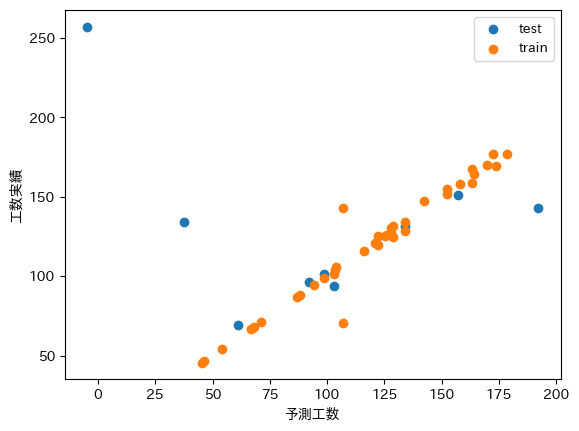

31    143.200000
8     129.093176
44      1.781987
11    144.319338
52    135.735606
23    176.062066
48     65.534069
22    101.300000
7     129.093176
dtype: float64
0.8920224823177794


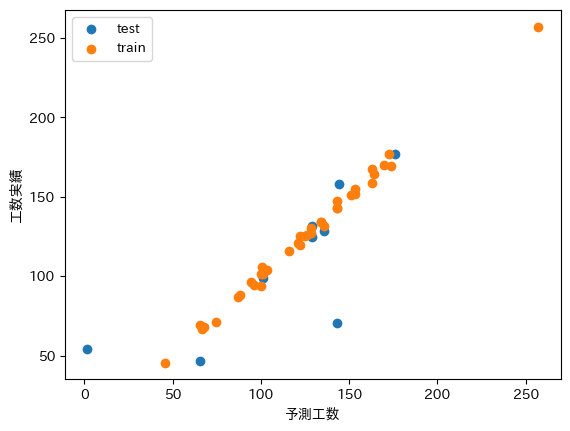

19     34.968865
27    167.600000
33     99.566558
41     70.594588
32     70.600000
1     108.461011
18     73.200459
42    119.600000
38    116.355854
dtype: float64
0.8304307723620299


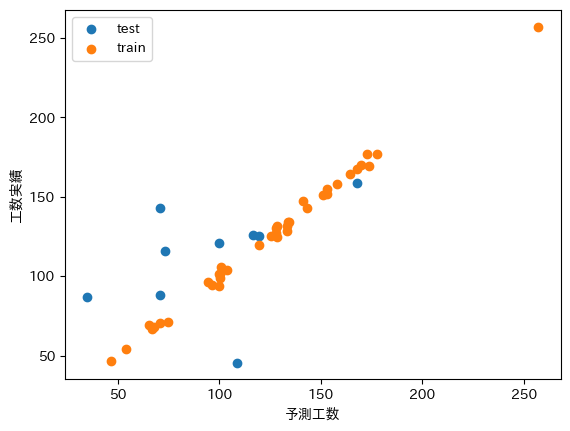

Fold 1: MSE = 4263.603330405882
Fold 2: MSE = 1972.9578360902901
Fold 3: MSE = 8937.50191179038
Fold 4: MSE = 959.2145914376581
Fold 5: MSE = 1634.1149220815325
Average MSE: 3553.4785183611484


In [ ]:
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import statsmodels.api as sm

# データの読み込みや生成
# df = ...

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 2:])
Y = df.iloc[:, 1]

# データを8:2に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# k分割交差検定の準備
k = 5  # 例として5分割
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 各分割でのモデルの評価
mse_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]

    model = sm.OLS(Y_train_fold, X_train_fold).fit()
    predictions = model.predict(X_val_fold)
    predictions2 = model.predict(X_train_fold)

    mse = ((Y_val_fold - predictions) ** 2).mean()
    mse_scores.append(mse)
    # print(model.summary())
    print(predictions)

    comparison = pd.DataFrame({'Actual': Y_val_fold, 'Predicted': predictions})
    comparison2 = pd.DataFrame({'Actual': Y_train_fold, 'Predicted': predictions2})

    plt.scatter(predictions, Y_val_fold,label="test")
    plt.scatter(predictions2, Y_train_fold,label="train")
    # Customize the plot
    # plt.title('散布図 費用',fontsize=16)

    y = pd.concat([predictions, predictions2])
    x = sm.add_constant(pd.concat([Y_val_fold, Y_train_fold]))

    model = sm.OLS(y, x)
    results = model.fit()

    results.params[0]#切片b
    results.params[1]#係数a
    y_pred = results.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

    plt.title("")
    plt.xlabel('予測工数')
    plt.ylabel('工数実績')
    plt.legend()

    plt.show()


# 各分割のMSEを表示
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse}")

# 平均MSEを表示
average_mse = np.mean(mse_scores)
print(f"Average MSE: {average_mse}")


                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     10.59
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           8.63e-06
Time:                        04:26:56   Log-Likelihood:                -165.79
No. Observations:                  47   AIC:                             395.6
Df Residuals:                      15   BIC:                             454.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積              6.438e-07   3.37e-07      1.

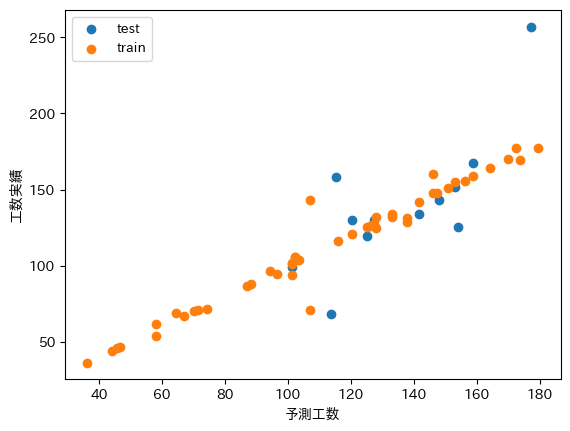

Mean Squared Error: 948.4917535327453

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     16.43
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           4.84e-08
Time:                        04:26:56   Log-Likelihood:                -165.30
No. Observations:                  47   AIC:                             388.6
Df Residuals:                      18   BIC:                             442.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積   

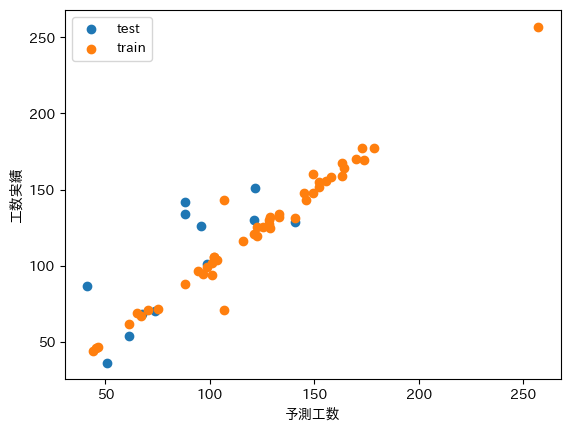

Mean Squared Error: 774.4538181345147

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     9.904
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           2.78e-06
Time:                        04:26:57   Log-Likelihood:                -163.63
No. Observations:                  47   AIC:                             385.3
Df Residuals:                      18   BIC:                             438.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積   

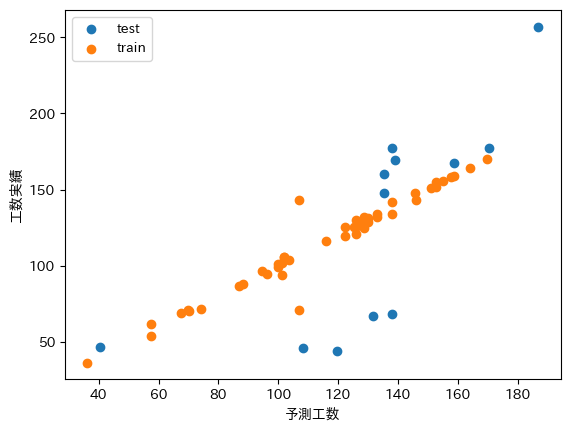

Mean Squared Error: 2251.8911765121284

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     94.14
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           6.41e-14
Time:                        04:26:57   Log-Likelihood:                -123.38
No. Observations:                  47   AIC:                             306.8
Df Residuals:                      17   BIC:                             362.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積  

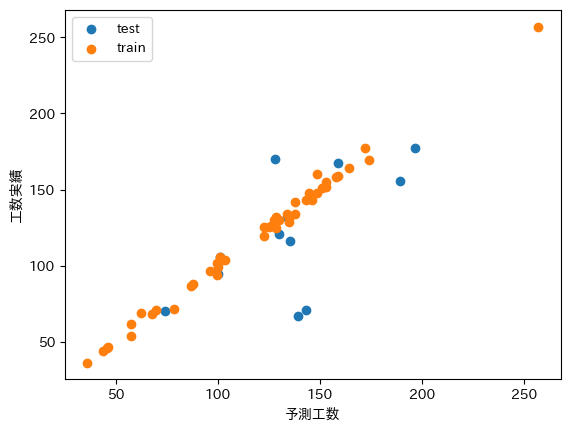

Mean Squared Error: 1201.6845331923503

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     75.98
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.63e-12
Time:                        04:26:58   Log-Likelihood:                -126.97
No. Observations:                  47   AIC:                             315.9
Df Residuals:                      16   BIC:                             373.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積  

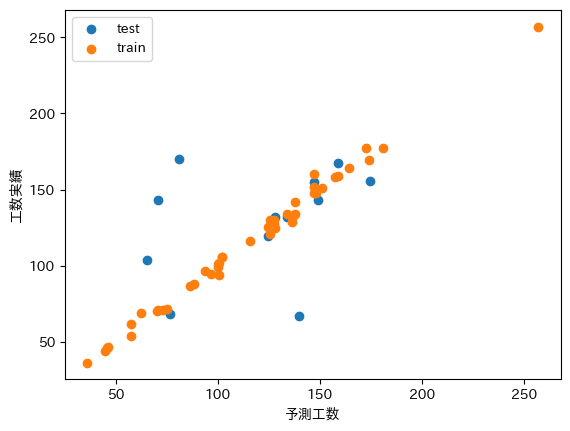

Mean Squared Error: 1717.6853893031196

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     92.11
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           4.25e-11
Time:                        04:26:59   Log-Likelihood:                -114.77
No. Observations:                  47   AIC:                             297.5
Df Residuals:                      13   BIC:                             360.4
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積  

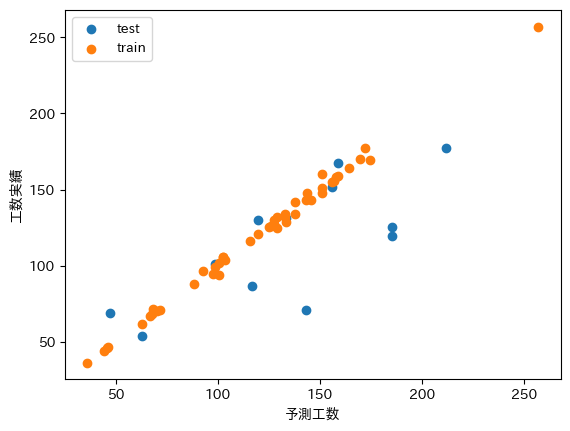

Mean Squared Error: 1340.2222323251178

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     66.00
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           8.55e-14
Time:                        04:26:59   Log-Likelihood:                -126.93
No. Observations:                  47   AIC:                             309.9
Df Residuals:                      19   BIC:                             361.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積  

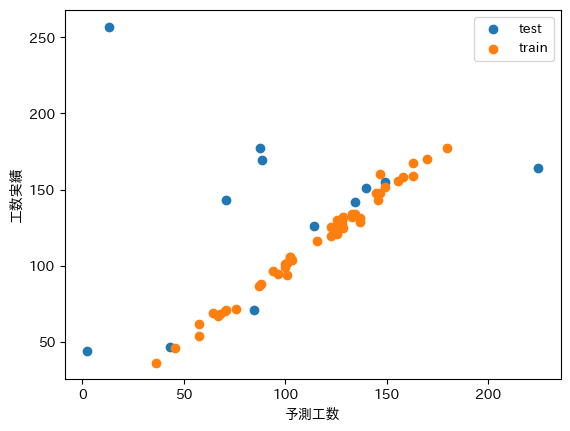

Mean Squared Error: 7102.387594101151

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     53.09
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           9.93e-11
Time:                        04:27:01   Log-Likelihood:                -127.59
No. Observations:                  47   AIC:                             319.2
Df Residuals:                      15   BIC:                             378.4
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積   

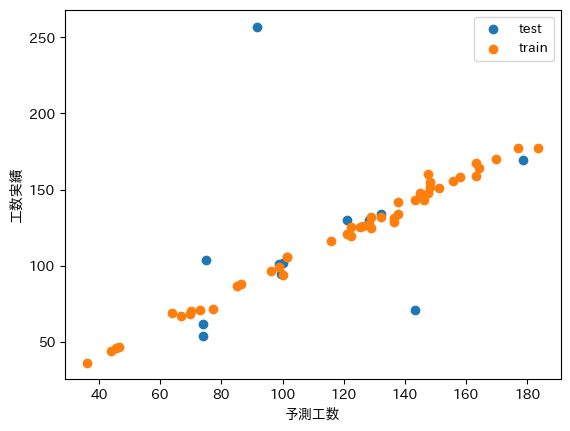

Mean Squared Error: 2847.4199841865084

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     105.6
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           5.02e-15
Time:                        04:27:02   Log-Likelihood:                -122.17
No. Observations:                  47   AIC:                             302.3
Df Residuals:                      18   BIC:                             356.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積  

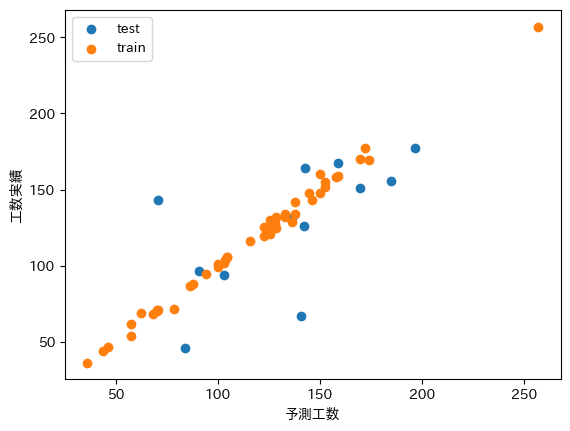

Mean Squared Error: 1225.6686486989056

                            OLS Regression Results                            
Dep. Variable:                     合計   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     66.91
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.11e-12
Time:                        04:27:02   Log-Likelihood:                -127.68
No. Observations:                  47   AIC:                             315.4
Df Residuals:                      17   BIC:                             370.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
体積  

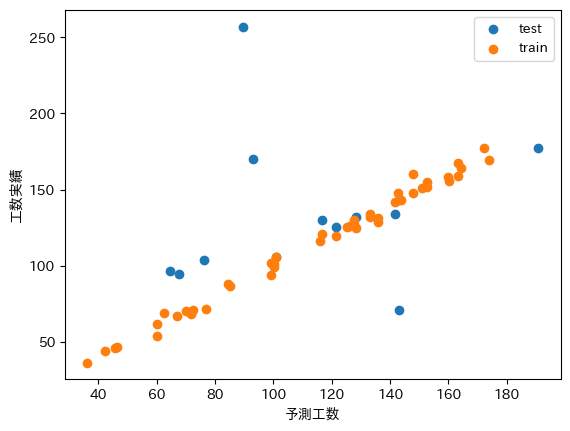

Mean Squared Error: 3516.5492905428105



In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

# データの読み込みや生成
# df = ...

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 2:])
Y = df.iloc[:, 1]

# 10回分割して8:2に分けてモデルに適用
for i in range(10):
    # データをランダムに分割
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)

    # モデルの適合
    model = sm.OLS(Y_train, X_train).fit()

    # テストデータで評価
    predictions = model.predict(X_test)
    predictions2 = model.predict(X_train)

    # 予測結果と実際の値を比較
    comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
    comparison2 = pd.DataFrame({'Actual': Y_train, 'Predicted': predictions2})
    # print(f"\nFold {i + 1}:\n", comparison)

    print(model.summary())
    print(predictions)

    plt.scatter(predictions, Y_test,label="test")
    plt.scatter(predictions2, Y_train,label="train")
    # Customize the plot
    # plt.title('散布図 費用',fontsize=16)

    y = pd.concat([predictions, predictions2])
    x = sm.add_constant(pd.concat([Y_test, Y_train]))

    model = sm.OLS(y, x)
    results = model.fit()

    results.params[0]#切片b
    results.params[1]#係数a
    y_pred = results.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

    plt.title("")
    plt.xlabel('予測工数')
    plt.ylabel('工数実績')
    plt.legend()

    plt.show()

    df_date = pd.concat([df_date,pd.merge(x,y.to_frame(),left_index=True,right_index=True)])

    # 評価指標の表示（必要に応じて）
    mse = ((Y_test - predictions) ** 2).mean()
    print(f"Mean Squared Error: {mse}\n")


In [ ]:
df_date = df_date.drop(df_date.index)#=pd.concat([df_date,pd.merge(x,y.to_frame(),left_index=True,right_index=True)])

In [ ]:
df_date.to_csv('test_1323.csv',encoding="cp932",index = True)
files.download('test_1323.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **多変量分析20240118**

In [ ]:
# todo
# 1.データ内の部品パラメータを処理、
#　　⇒⇒　使用頻度Top10製品の「工数/割合」の可視化、工数Top10と割合Top10?
#　　⇒　とりあえずそれぞれのTop10を出す、かつ重複であるかどうかを見てみるとよい
# 2.数量化Ⅰ類分析トライ
# 　①直線上と以上のデータ工程のパーセンテージ比較
# 　②パラメータ選定




パラメータPlot

使用頻度の高いもの？

In [ ]:
# 各列の合計を計算
column_sums = df7.sum()

# 合計が大きいものからTop10を抽出
top_10_columns = column_sums.nlargest(12)
#抽出数はデータ確認後、再調整する必要あり

# Top10の列名と合計を新しいDataFrameにまとめる
df7_top = pd.DataFrame({'ColumnName': top_10_columns.index, 'Total': top_10_columns.values})
df7_top = df7_top.drop(index=0).reset_index(drop=True)

In [ ]:
len(df7)

79

In [ ]:
df7_top

,ColumnName,Total
0,アーム,59
1,ロッド,59
2,取付板A,53
3,取付板B,53
4,キャビティB面,52
5,キャビティA面,52
6,ガイドブロック,49
7,吹込み針,47
8,パリソン押え,37
9,キャビティA,23


In [ ]:
for i in df7_top10["ColumnName"]:
  print(i)

アーム
ロッド
取付板A
取付板B
キャビティB面
キャビティA面
ガイドブロック
吹込み針
パリソン押え
キャビティA
キャビティB


In [ ]:
# 各列の平均を計算
column_means = df8.mean()

# 平均が大きいものからTop10を抽出
top_10_columns = column_means.nlargest(21)

# Top10の列名と平均を新しいDataFrameにまとめる
df8_top10 = pd.DataFrame({'ColumnName': top_10_columns.index, 'Mean': top_10_columns.values})
df8_top10 = df8_top10.drop(index=0).reset_index(drop=True)

# 結果の表示
df8_top10

,ColumnName,Mean
0,キャビティB1,178.000000
1,キャビティＢ面,69.500000
2,キャビティA1,68.000000
3,キャビティB1面,47.500000
4,キャビティA面,45.086538
5,キャビティB2面,44.500000
6,キャビティB面,43.903846
7,キャビティA2面,43.000000
8,キャビティA1面,43.000000
9,キャビティB,42.326087


In [ ]:
# 各列の平均を計算
column_means = df9.mean()

# 平均が大きいものからTop10を抽出
top_10_columns = column_means.nlargest(21)

# Top10の列名と平均を新しいDataFrameにまとめる
df9_top10 = pd.DataFrame({'ColumnName': top_10_columns.index, 'Mean': top_10_columns.values})
df9_top10 = df9_top10.drop(index=0).reset_index(drop=True)

# 結果の表示
df9_top10

,ColumnName,Mean
0,キャビティB1,0.690726
1,キャビティB,0.427842
2,キャビティA,0.423274
3,キャビティA面,0.411718
4,キャビティB面,0.405114
5,キャビティＢ面,0.369681
6,キャビティA1,0.263873
7,キャビティB1面,0.239178
8,キャビティB2面,0.223977
9,キャビティA2面,0.216376


In [ ]:
df7_top10